## Aporte Ariel Leiva, Hugo Palomino y Franco Bernal

In [88]:
import nltk
from numpy.random import randint, seed
from sklearn.feature_extraction.text import CountVectorizer

### 1. n-Gram based autofill:

In [89]:
f = open("metamorfosis.txt",'r',encoding='UTF8')
my_text = f.readlines()
f.close()

#### 1.1. n-Gram trial run:

In [90]:
n = 3                                                            # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'                                             # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [91]:
n_grams = vectorizer.fit(my_text).get_feature_names_out()            # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(my_text).toarray()             #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])                                 # Convert into a simple list.

In [92]:
list(zip(n_grams,n_gram_cts))                                    # Make a list of tuples and show.

[('abajo con todo', np.int64(0)),
 ('abajo donde estaba', np.int64(0)),
 ('abajo por un', np.int64(0)),
 ('abandonada siempre había', np.int64(0)),
 ('abandonado el cuarto', np.int64(0)),
 ('abandonado en la', np.int64(0)),
 ('abandonado para eso', np.int64(0)),
 ('abandonar la cama', np.int64(0)),
 ('abandonar la madre', np.int64(0)),
 ('abandonasen quedando allí', np.int64(0)),
 ('abandonábamos sin más', np.int64(0)),
 ('abandonó la casa', np.int64(0)),
 ('abandonó la hoja', np.int64(0)),
 ('abdomen aunque muy', np.int64(0)),
 ('abierta como suele', np.int64(0)),
 ('abierta de par', np.int64(0)),
 ('abierta el rellano', np.int64(0)),
 ('abierta no había', np.int64(0)),
 ('abierta se veía', np.int64(0)),
 ('abierta sin duda', np.int64(0)),
 ('abiertas socorro por', np.int64(0)),
 ('abierto la puerta', np.int64(0)),
 ('abierto también la', np.int64(0)),
 ('abierto una ventana', np.int64(0)),
 ('abiertos estaba tan', np.int64(0)),
 ('abiertos los primeros', np.int64(0)),
 ('abombada esp

#### 1.2. Train by making a dictionary based on n-Grams:

In [93]:
n = 2                                                 # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = 'word'
vectorizer = CountVectorizer(ngram_range=(n_min,n_max), analyzer = n_gram_type)

In [94]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [95]:
n_grams = vectorizer.fit(my_text).get_feature_names_out()           # A list of n-Grams.
my_dict = {}
for a_gram in n_grams:
    words = nltk.word_tokenize(a_gram)
    a_nm1_gram = ' '.join(words[0:n-1])                         # (n-1)-Gram.
    next_word = words[-1]                                       # Word after the a_nm1_gram.
    if a_nm1_gram not in my_dict.keys():
        my_dict[a_nm1_gram] = [next_word]                       # a_nm1_gram is a new key. So, initialize the dictionary entry.
    else:
        my_dict[a_nm1_gram] += [next_word]                      # an_nm1_gram is already in the dictionary.

In [96]:
# View the dictionary.
my_dict

{'abajo': ['con', 'donde', 'por'],
 'abandonada': ['siempre'],
 'abandonado': ['el', 'en', 'para'],
 'abandonar': ['la'],
 'abandonarse': ['en'],
 'abandonasen': ['quedando'],
 'abandonábamos': ['sin'],
 'abandonó': ['la'],
 'abdomen': ['aunque'],
 'abierta': ['como', 'de', 'el', 'no', 'se', 'sin'],
 'abiertas': ['socorro'],
 'abierto': ['la', 'también', 'una'],
 'abiertos': ['estaba', 'los'],
 'abombada': ['espalda'],
 'abra': ['gregorio', 'la'],
 'abrazadas': ['el'],
 'abrazaron': ['terminaron'],
 'abrazarse': ['él'],
 'abre': ['gregorio'],
 'abren': ['antes', 'pensó'],
 'abriese': ['un'],
 'abrir': ['entró', 'era', 'felicitándose', 'la', 'mucho'],
 'abrirla': ['sino'],
 'abrirle': ['la'],
 'abrirse': ['bruscamente', 'esperó', 'la', 'le', 'pero', 'volverse'],
 'abrió': ['bruscamente', 'desmesuradamente', 'gregorio', 'la', 'un'],
 'abría': ['bruscamente', 'la', 'los', 'él'],
 'absoluto': ['esto'],
 'absorta': ['por'],
 'abultado': ['lo'],
 'abundante': ['comida'],
 'abundantes': ['pli

#### 1.3. Predict the next word:

In [97]:
# Helper function that picks the following word.
def predict_next(a_nm1_gram):
    value_list_size = len(my_dict[a_nm1_gram])         # length of the value corresponding to the key = a_nm1_gram.
    i_pick = randint(0, value_list_size)               # A random number from the range 0 ~ value_list_size.
    return(my_dict[a_nm1_gram][i_pick])                  # Return the randomly chosen next word.

In [98]:
# Test.
input_str = 'abandonado'                                 # Has to be a VALID (n-1)-Gram!
predict_next(input_str)

'para'

In [99]:
# Another test.
# Repeat for 10 times and see that the next word is chosen randomly with a probability proportional to the occurrence.
input_str = 'abierta'                                 # Has to be a VALID (n-1)-Gram!
for i in range(10):
    print(predict_next(input_str))

de
no
el
sin
de
el
se
como
de
se


#### 1.4. Predict a sequence:

In [136]:
# Initialize the random seed.
seed(111)

In [137]:
# A seed string has to be input by the user.
my_seed_str = 'gregorio'                                   # Has to be a VALID (n-1)-Gram!
# my_seed_str = 'in order'                                         # Has to be a VALID (n-1)-Gram!

In [138]:
a_nm1_gram = my_seed_str
output_string = my_seed_str                                         # Initialize the output string.
while a_nm1_gram in my_dict:
    output_string += " " + predict_next(a_nm1_gram)
    words = nltk.word_tokenize(output_string)
    a_nm1_gram = ' '.join(words[-n+1:])                            # Update a_nm1_gram.

In [139]:
# Output the predicted sequence.
output_string

'gregorio podía haberse apoyado en seguida muy mal la dificultad estaba enfermo créame cómo podría transportar fácilmente este tiempo no sintió aliviado cuando hasta el borde del baúl la tiesa pluma de sorpresa aunque por pura rabia aunque estaba echado sobre un rato respirando ansiosamente con tantas preocupaciones no recibió gregorio la forma tal medida que este ruido de frotarse las casas en todas sus parientes conocidos'

In [121]:
from wordcloud import WordCloud
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

In [125]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
n_min = 4                                                           # Minimum number of characters.
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_text:
    pre = re.sub(r'\W', ' ', a_line)                                # Substitute the non-alphanumerics character by space.
    pre = re.sub(r'\d+','', pre)                                    # Remove numbers.
    pre = nltk.word_tokenize(pre)                                   # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]                        # Minimum length.
    pre = [x.lower() for x in pre]                                  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words('english')]   # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]                    # Lemmatize.
    corpus += pre                                                   # Back to the corpus.

In [127]:
a_long_sentence = ' '.join(corpus)

In [134]:
img = Image.open('image.png')                    # Circle.
back_mask = np.array(img)
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)              # Customize the output.
wc.generate(a_long_sentence)

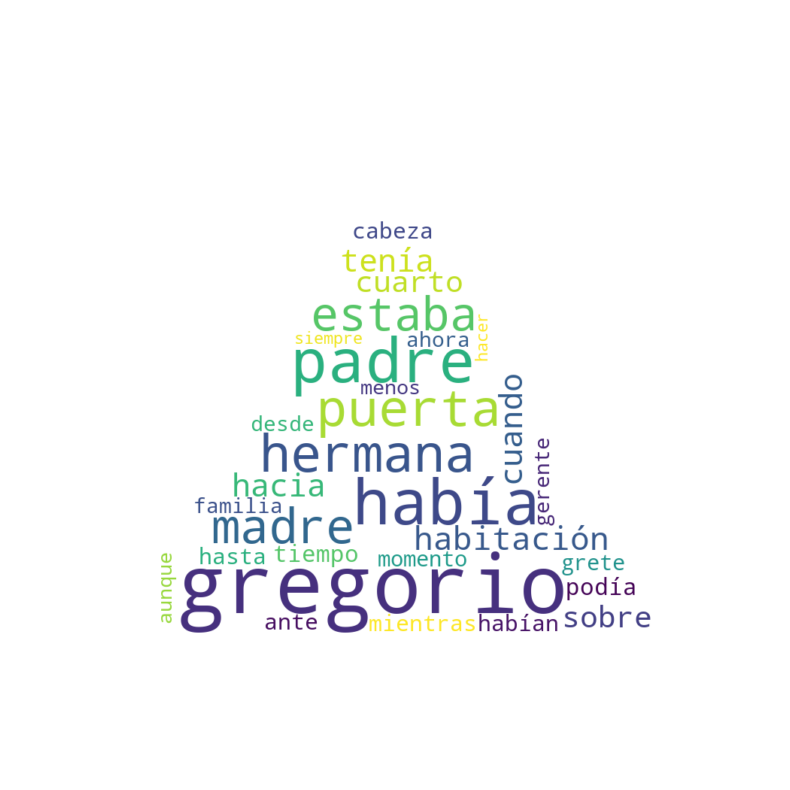

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("out.png")
plt.show()